<a href="https://colab.research.google.com/github/DayrisRM/Breast_Cancer_Detection_Neural_Networks/blob/main/Breast_Cancer_1992Dataset_Neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("/content/breast-cancer-1992-v4.csv", sep=";")
df

,code,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0
695,841769,2,1,1,1,2,1,1,1,1,0
696,888820,5,10,10,3,7,3,8,10,2,1
697,897471,4,8,6,4,3,4,10,6,1,1


In [16]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [17]:
df.columns.values

array(['code', 'ClumpThickness', 'UniformityCellSize',
       'UniformityCellShape', 'MarginalAdhesion',
       'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin',
       'NormalNucleoli', 'Mitoses', 'Class'], dtype=object)

In [18]:
df = df.drop("code", axis=1)
df

,ClumpThickness,UniformityCellSize,UniformityCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=42,
                       stratify=y)

In [28]:
print('All:', np.bincount(y) / float(len(y)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels)) * 100.0)
     

All: [65.52217454 34.47782546]
Training: [65.4396728 34.5603272]
Test: [65.71428571 34.28571429]


In [29]:
print('Train date:', len(train_data))
print('Test date:', len(test_data))

Train date: 489
Test date: 210


In [30]:
# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



---



**Neural network with 2 hidden layers and 1 output layer**

In [32]:
# Create a sequential model
model1 = Sequential()

In [50]:
# neural network architecture
model1 = Sequential()
model1.add(Dense(12, input_dim=9, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))


In [51]:
# Compile your model
model1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [52]:
# Display a summary of your model
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                120       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Train your model for 20 epochs
history_model1 = model1.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs = 100)

Epoch 1/100
16/16 [==============================] - 1s 32ms/step - loss: 0.0960 - accuracy: 0.9775 - val_loss: 0.1865 - val_accuracy: 0.9476
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.0961 - accuracy: 0.9775 - val_loss: 0.1863 - val_accuracy: 0.9476
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0948 - accuracy: 0.9775 - val_loss: 0.1858 - val_accuracy: 0.9429
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0955 - accuracy: 0.9816 - val_loss: 0.1903 - val_accuracy: 0.9429
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9796 - val_loss: 0.1844 - val_accuracy: 0.9476
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0942 - accuracy: 0.9755 - val_loss: 0.1840 - val_accuracy: 0.9476
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.9775 - val_loss: 0.1844 - val_accuracy: 0.9476
Epoch 8/100


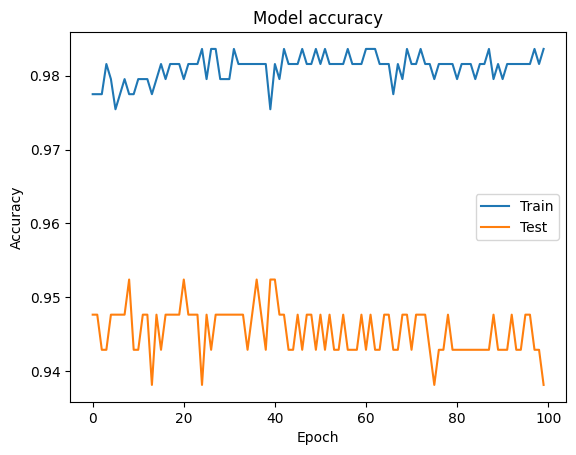

In [93]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [94]:
# Evaluate the model
_, accuracy = model1.evaluate(test_data, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.1643 - accuracy: 0.9381
Accuracy: 93.81


In [95]:
from sklearn.metrics import confusion_matrix

# Predict class for test data
y_pred = model1.predict(test_data)
y_pred = (y_pred > 0.5)

# Generate confusion matrix
confusion_matrix_m1 = confusion_matrix(test_labels, y_pred)
print(confusion_matrix_m1)


7/7 [==============================] - 0s 3ms/step
[[131   7]
 [  6  66]]


[[131   7]
 [  6  66]]


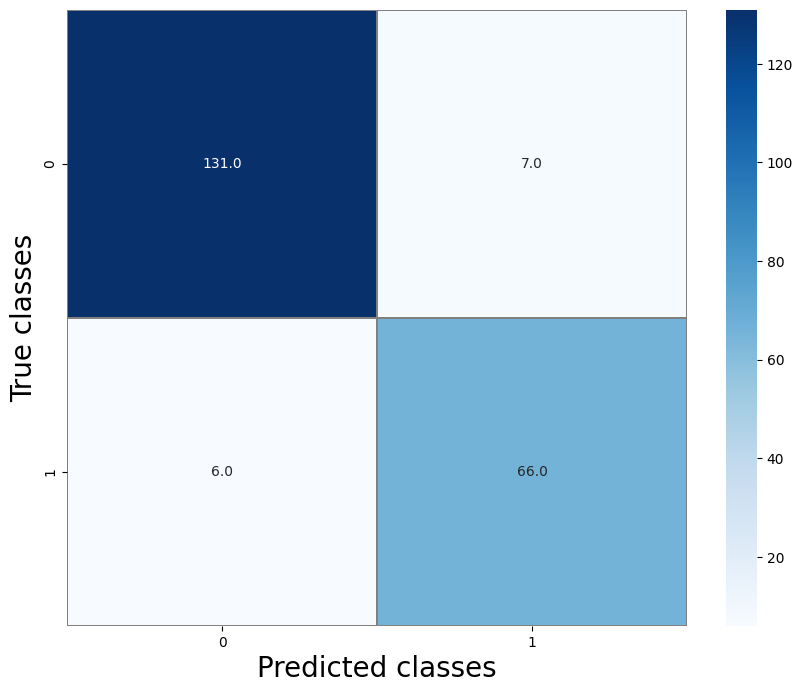

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

#Print confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_m1, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(confusion_matrix_m1)




---



Neural network v2 -- Same architecture with Adam optimizer and callbacks: {EarlyStopping, ReduceLROnPlateau}

In [98]:
# Create a sequential model
model2 = Sequential()

In [99]:
# neural network architecture
model2 = Sequential()
model2.add(Dense(12, input_dim=9, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [100]:
from keras.optimizers import Adam

#model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [101]:
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 12)                120       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [102]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-4)

In [103]:
# fit model
history_model2 = model2.fit(train_data, train_labels,
           validation_data=(test_data, test_labels),
           epochs = 100, verbose=1, callbacks=[es, rlrop])

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 2.3470 - accuracy: 0.6544 - val_loss: 1.9093 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 1.6337 - accuracy: 0.6544 - val_loss: 1.3173 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1335 - accuracy: 0.6544 - val_loss: 0.9612 - val_accuracy: 0.6571 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8903 - accuracy: 0.4438 - val_loss: 0.7950 - val_accuracy: 0.2190 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7720 - accuracy: 0.2372 - val_loss: 0.7380 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7250 - accuracy: 0.3088 - val_loss: 0.7055 - val_accuracy: 0.3286 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.

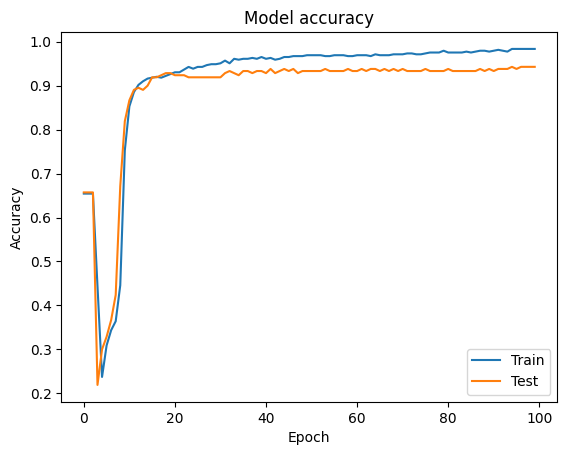

In [104]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [105]:
# Evaluate the model
_, accuracy_m2 = model2.evaluate(test_data, test_labels)
print('Accuracy: %.2f' % (accuracy_m2*100))

7/7 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9429
Accuracy: 94.29


In [106]:
# Predict class for test data
y_pred_m2 = model2.predict(test_data)
y_pred_m2 = (y_pred_m2 > 0.5)


7/7 [==============================] - 0s 3ms/step


In [107]:
# Generate confusion matrix
confusion_matrix_m2 = confusion_matrix(test_labels, y_pred_m2)
print(confusion_matrix_m2)

[[131   7]
 [  5  67]]


[[131   7]
 [  5  67]]


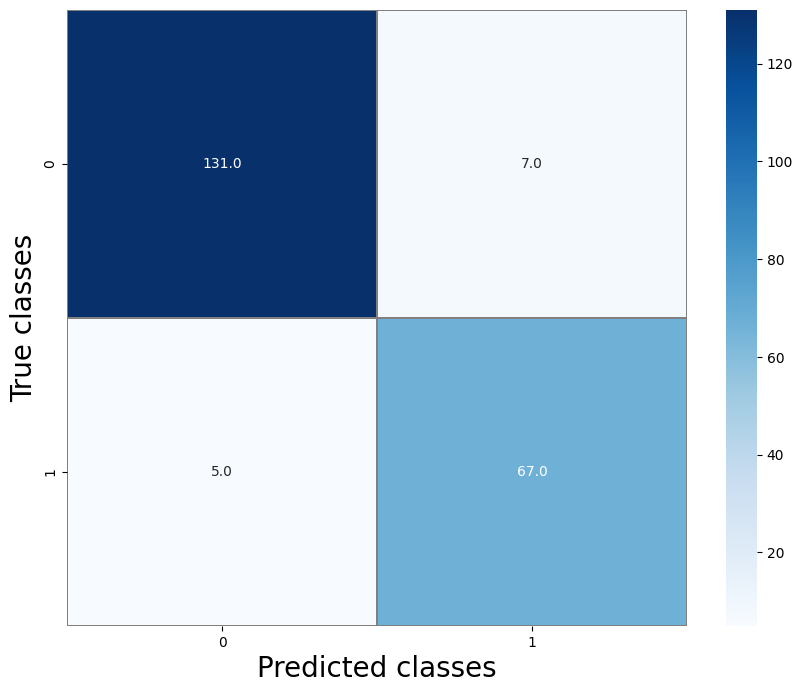

In [108]:
#Print confusion matrix
plt.figure(figsize = (10,8))
sns.heatmap(confusion_matrix_m2, linewidths = 0.1, cmap = 'Blues', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)
print(confusion_matrix_m2)
